# (MultiFiT) Portuguese Text Classifier on TCU jurisprudência dataset
### MultiFiT configuration
- **Architecture 4 QRNN with 1550 hidden parameters by layer, SentencePiece tokenizer (15 000 tokens)**
- **Hyperparameters and training method from the MultiFiT paper**

- Author: [Pierre Guillou](https://www.linkedin.com/in/pierreguillou)
- Date: **edition of October 15, 2019** (initial publication on September 2019)
- Post in medium: [link](https://medium.com/@pierre_guillou/nlp-fastai-portuguese-language-model-980c8ec75362)
- Ref: [Fastai v1](https://docs.fast.ai/) (Deep Learning library on PyTorch)

## Warning (15/10/2019)

**This notebook is a modified version of the v1 published in September 2019.** Indeed (thanks to [David Vieira](https://medium.com/@davidhsv/ol%C3%A1-pierre-tudo-bom-2bc8ae36dc14)), we noticed that the fine-tuning of the LM and classifier did not use the SentencePiece model and vocab trained for the General Portuguese Language Model ([lm3-portuguese.ipynb](https://github.com/piegu/language-models/blob/master/lm3-portuguese.ipynb)).

For example, the code used to create the fine-tuned Portuguese forward LM was : 

```data_lm = (TextList.from_df(df_trn_val, path, cols=reviews, 
                            processor=[OpenFileProcessor(), SPProcessor(max_vocab_sz=15000)])
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))```
    
It has been corrected by using the [SPProcessor.load()](https://github.com/fastai/fastai/blob/master/fastai/text/data.py#L481) function:

```data_lm = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))```
    
Therefore, we retrained the fine-tuned Portuguese forward LM and the classifier on TCU jurisprudência dataset and **got better results! :-)** (see the Results paragraph to get all results)

- **(fine-tuned) Language Model**   
    - forward : (accuracy) **51.56%** instead of 44.66% | (perplexity) 11.38 instead of 15.97
    - backward: (accuracy) **52.15%** instead of 44.97% | (perplexity) 12.54 instead of 18.73

- **(fine-tuned) Text Classifier**
    - **Accuracy** (ensemble) **97.95%** instead of 97.39%
    - **f1 score** (ensemble): **0.9795** instead of 0.9737

## Information

### Overview

According to this new article "[MultiFiT: Efficient Multi-lingual Language Model Fine-tuning](https://arxiv.org/abs/1909.04761)" (September 10, 2019), the QRNN architecture and the SentencePiece tokenizer give better results than AWD-LSTM and the spaCy tokenizer respectively. 

Therefore, they have been used in this notebook to **fine-tune a Portuguese Bidirectional Language Model** by Transfer Learning of a Portuguese Bidirectional Language Model (with the QRNN architecture and the SentencePiece tokenizer, too) trained on a Wikipedia corpus of 100 millions tokens ([lm3-portuguese.ipynb](https://github.com/piegu/language-models/blob/master/lm3-portuguese.ipynb)). 

This Portuguese Bidirectional Language Model has been **fine-tuned on the [tcu_jurisp_reduzido.csv dataset about TCU jurisprudência](https://github.com/fastai-bsb/nlp-tcu-enunciados/blob/master/tcu_jurisp_reduzido.csv?raw=true)"** and **its encoder part has been transfered to a text classifier which has been finally trained on this corpus**.

This process **LM General --> LM fine-tuned --> Classifier fine-tuned** is called [ULMFiT](http://nlp.fast.ai/category/classification.html) but we trained our 3 models with the hyperparameters values and method of the [MultiFiT](https://arxiv.org/abs/1909.04761) paper that are given at the end of the MultiFiT paper.

### Hyperparameters values

- Language Model
    - (batch size) bs = 50
    - (QRNN) 4 QRNN (default: 3) with 1550 hidden parameters each one (default: 1152)
    - (SentencePiece) vocab of 15000 tokens
    - (dropout) mult_drop = 1.0
    - (weight decay) wd = 0.1
    - (number of training epochs) 20 epochs
    - (learning rate) modified version of 1-cycle learning rate schedule (Smith, 2018) that uses cosine instead of linear annealing, cyclical momentum and discriminative finetuning
    - (loss) FlattenedLoss of weighted LabelSmoothingCrossEntropy
    

- Sentiment Classifier
    - (batch size) bs = 18
    - (SentencePiece) vocab of 15000 tokens
    - (dropout) mult_drop = 0.3
    - (weight decay) wd = 0.1
    - (number of training epochs) 14 epochs (forward) and 19 epochs (backward)
    - (learning rate) modified version of 1-cycle learning rate schedule (Smith, 2018) that uses cosine instead of linear annealing, cyclical momentum and discriminative finetuning
    - (loss) FlattenedLoss of weighted LabelSmoothingCrossEntropy 

## Results

**We can conclude that this Bidirectional Portuguese LM model using the MultiFiT configuration is a good model to perform text classification but with about 46 millions of parameters, it is far from being a LM that can gan compete with [GPT-2](https://openai.com/blog/better-language-models/) or [BERT](https://arxiv.org/abs/1810.04805) in NLP tasks like text generation.**
    
    
- **About the data**: the dataset [tcu_jurisp_reduzido.csv](https://github.com/fastai-bsb/nlp-tcu-enunciados/blob/master/tcu_jurisp_reduzido.csv?raw=true) about "TCU jurisprudência" is unbalanced. Therefore, we used a weighted loss function (FlattenedLoss of weighted LabelSmoothingCrossEntropy).
    - number of texts: 10263
        - class 0: 3468 (33.79%)
        - class 1: 2723 (26.53%)
        - class 2: 2297 (22.38%)
        - class 3: 1775 (17.3%)


- **(fine-tuned) Language Model**   
    - forward : (accuracy) 51.56% | (perplexity) 11.38
    - backward: (accuracy) 52.15% | (perplexity) 12.54
    

- **(fine-tuned) Text Classifier**

    - **Accuracy**
        - forward : (global) 97.08% | (class 0) 98.49% | (class 1) 98.24% | (class 2) 96.71% | (class 3) 93.40%
        - backward: (global) 97.07% | (class 0) 99.10% | (class 1) 97.89% | (class 2) 96.71% | (class 3) 92.89%
        - ensemble: (global) **97.95%** | (class 0) **99.40%** | (class 1) **99.30%** | (class 2) **97.18%** | (class 3) **94.42%**

    - **f1 score**
        - forward: 0.9707
        - backward: 0.9708
        - ensemble: **0.9795**

(neg = negative reviews | pos = positive reviews)

## Initialisation

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
from fastai.callbacks import *

import matplotlib.cm as cm

In [2]:
!python -m fastai.utils.show_install



```text
=== Software === 
python        : 3.7.4
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.2.0
nvidia driver : 410.104
torch cuda    : 10.0.130 / is available
torch cudnn   : 7602 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 16130MB | Tesla V100-SXM2-16GB

=== Environment === 
platform      : Linux-4.9.0-9-amd64-x86_64-with-debian-9.9
distro        : #1 SMP Debian 4.9.168-1+deb9u5 (2019-08-11)
conda env     : base
python        : /opt/anaconda3/bin/python
sys.path      : /home/jupyter/tutorials/fastai/course-nlp
/opt/anaconda3/lib/python37.zip
/opt/anaconda3/lib/python3.7
/opt/anaconda3/lib/python3.7/lib-dynload
/opt/anaconda3/lib/python3.7/site-packages
/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:


In [2]:
# bs=48
# bs=24
bs=50

In [3]:
torch.cuda.set_device(0)

In [4]:
data_path = Config.data_path()

This will create a `{lang}wiki` folder, containing a `{lang}wiki` text file with the wikipedia contents. (For other languages, replace `{lang}` with the appropriate code from the [list of wikipedias](https://meta.wikimedia.org/wiki/List_of_Wikipedias).)

In [5]:
lang = 'pt'

In [6]:
name = f'{lang}wiki'
path = data_path/name
path.mkdir(exist_ok=True, parents=True)

lm_fns3 = [f'{lang}_wt_sp15_multifit', f'{lang}_wt_vocab_sp15_multifit']
lm_fns3_bwd = [f'{lang}_wt_sp15_multifit_bwd', f'{lang}_wt_vocab_sp15_multifit_bwd']

In [7]:
from sklearn.metrics import f1_score

@np_func
def f1(inp,targ): return f1_score(targ, np.argmax(inp, axis=-1), average='weighted')

In [8]:
# source: https://github.com/fastai/fastai/blob/master//fastai/layers.py#L300:7
# blog: https://bfarzin.github.io/Label-Smoothing/
class WeightedLabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, weight, eps:float=0.1, reduction='mean'):
        super().__init__()
        self.weight,self.eps,self.reduction = weight,eps,reduction
        
    def forward(self, output, target):
        c = output.size()[-1]
        log_preds = F.log_softmax(output, dim=-1)
        if self.reduction=='sum': loss = -log_preds.sum()
        else:
            loss = -log_preds.sum(dim=-1)
            if self.reduction=='mean':  loss = loss.mean()
        return loss*self.eps/c + (1-self.eps) * F.nll_loss(log_preds, target, weight=self.weight, reduction=self.reduction)

In [9]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

## Data

TCU jurisprudência:
- reduzido: https://github.com/fastai-bsb/nlp-tcu-enunciados/blob/master/tcu_jurisp_reduzido.csv
- completo: https://github.com/fastai-bsb/nlp-tcu-enunciados/blob/master/tcu_jurisp.csv

### Download

In [8]:
import urllib.request
from converter import *

In [9]:
# create TCU folder
name_data = 'TCU'
path_data = data_path/name_data
path_data.mkdir(exist_ok=True, parents=True)

In [10]:
%%time
# Download each file from url and save it locally under file_name

url = 'https://github.com/fastai-bsb/nlp-tcu-enunciados/blob/master/tcu_jurisp_reduzido.csv?raw=true'
file_name = 'tcu_jurisp_reduzido.csv'
url_file = path_data/file_name
urllib.request.urlretrieve(url, url_file)

url = 'https://raw.githubusercontent.com/fastai-bsb/nlp-tcu-enunciados/master/tcu_jurisp.csv'
file_name = 'tcu_jurisp.csv'
url_file = path_data/file_name
urllib.request.urlretrieve(url, url_file)

CPU times: user 48 ms, sys: 20 ms, total: 68 ms
Wall time: 1.41 s


(PosixPath('/home/jupyter/.fastai/data/TCU/tcu_jurisp.csv'),
 <http.client.HTTPMessage at 0x7f9a1cec6b50>)

In [11]:
path_data.ls()

[PosixPath('/home/jupyter/.fastai/data/TCU/tcu_jurisp_reduzido_preprocessed.csv'),
 PosixPath('/home/jupyter/.fastai/data/TCU/tcu_jurisp_reduzido.csv'),
 PosixPath('/home/jupyter/.fastai/data/TCU/tcu_jurisp.csv')]

In [12]:
!head -n4 {path_data.ls()[0]}

text,labels
"A medida cautelar do TCU que determina a suspensão de licitação por falhas no edital não impede o órgão ou a entidade de rever seu ato convocatório, valendo-se do poder de autotutela (art. 49 da Lei 8.666/1993 c/c o art. 9º da Lei 10.520/2002) , com o objetivo de, antecipando-se a eventual deliberação do Tribunal, promover de modo próprio a anulação da licitação e o refazimento do edital, livre dos vícios apontados.",3
"A retenção de recursos pela Administração com vistas ao ressarcimento do prejuízo ou a existência de ação judicial para o reconhecimento do dano ao erário não constituem óbices ao prosseguimento da tomada de contas especial no TCU. Ocorrendo ressarcimento em uma instância, basta que o responsável apresente essa comprovação perante o juízo de execução para evitar o duplo pagamento.</p><p><b>Enunciado </b>",3
"Para fins de admissibilidade de recurso de revisão, considera-se documento novo todo aquele ainda não examinado no processo.",3


### Overview

In [13]:
# to solve display error of pandas dataframe
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [14]:
df = pd.read_csv(path_data/'tcu_jurisp_reduzido.csv', encoding='utf-8')
print(len(df))
print(Counter(df.labels))
df.head()

10263
Counter({0: 3468, 1: 2723, 2: 2297, 3: 1775})


,Unnamed: 0,labels,text
0,0,3,A medida cautelar do TCU que determina a suspe...
1,1,3,A retenção de recursos pela Administração com ...
2,2,3,Para fins de admissibilidade de recurso de rev...
3,3,3,"Fotografias não têm pleno valor probatório, so..."
4,4,3,Não cabe instauração de tomada de contas espec...


In [15]:
df = pd.read_csv(path_data/'tcu_jurisp.csv', encoding='utf-8')
print(len(df))
print(Counter(df.labels))
df.head()

13258
Counter({0: 3468, 1: 2723, 2: 2297, 3: 1775, 4: 932, 5: 673, 6: 572, 7: 343, 8: 337, 9: 138})


,Unnamed: 0,labels,text
0,0,6,O TCU tem competência para fiscalizar a aplica...
1,1,6,"Não compete ao TCU apreciar, para fins de regi..."
2,2,6,Compete ao TCU a apreciação da constitucionali...
3,3,6,É possível a expedição de determinação pelo TC...
4,4,6,"O TCU não tem competência, no âmbito do Progra..."


### Analysis (reduzido file)

In [16]:
df = pd.read_csv(path_data/'tcu_jurisp_reduzido.csv', encoding='utf-8')
print(len(df))
print(Counter(df.labels))
df.head()

10263
Counter({0: 3468, 1: 2723, 2: 2297, 3: 1775})


,Unnamed: 0,labels,text
0,0,3,A medida cautelar do TCU que determina a suspe...
1,1,3,A retenção de recursos pela Administração com ...
2,2,3,Para fins de admissibilidade de recurso de rev...
3,3,3,"Fotografias não têm pleno valor probatório, so..."
4,4,3,Não cabe instauração de tomada de contas espec...


In [17]:
# columns names
reviews = "text"
label = "labels"

# keep columns
df2 = df[[reviews,label]].copy()

In [18]:
# number of reviews
print(f'(orginal csv) number of all reviews: {len(df2)}')

# keep not null reviews
## delete nan reviews
empty_nan = (df2[reviews].isnull()).sum()
df2 = df2[df2[reviews].notnull()]
## delete empty reviews
list_idx_none = []
for idxs, row in df2.iterrows():
    if row[reviews].strip() == "":
        df2.drop(idxs, axis=0, inplace=True)
        list_idx_none.append(idxs)
empty_none = len(list_idx_none)
## print results
empty = empty_nan+empty_none
if empty != 0:
    print(f'{empty} empty reviews were deleted')
else:
    print('there is no empty review.')

# # check that there is no twice the same review
# # keep the first of unique review_id reviews
# same = len(df2) - len(df2[idx].unique())
# if same != 0:
#     df2.drop_duplicates(subset=[idx], inplace=True)
#     print(f'from the {same} identical reviews ids, only the first one has been kept.')
# else:
#     print('there is no identical review id.')

## delete nan labels
empty_label_nan = (df2[label].isnull()).sum()
df2 = df2[df2[label].notnull()]
print(f'{empty_label_nan} reviews with nan label were deleted')

# number of reviews by class
counter = Counter(df2[label])
clas_0, clas_1, clas_2, clas_3 = counter[0], counter[1], counter[2], counter[3]
num = len(df2)
pc_clas_0, pc_clas_1 = round((clas_0/num)*100,2), round((clas_1/num)*100,2)
pc_clas_2, pc_clas_3 = round((clas_2/num)*100,2), round((clas_3/num)*100,2)
print(f'\nnumber of text of class 0: {clas_0} ({pc_clas_0}%)')
print(f'number of text of class 1: {clas_1} ({pc_clas_1}%)')
print(f'number of text of class 2: {clas_2} ({pc_clas_2}%)')
print(f'number of text of class 3: {clas_3} ({pc_clas_3}%)')
print(f'\n(final) number of all texts: {num}')  

# convert HTML caracters to normal letters
df2[reviews] = df2[reviews].apply(convert)

df2.head(5)

(orginal csv) number of all reviews: 10263
there is no empty review.
0 reviews with nan label were deleted

number of text of class 0: 3468 (33.79%)
number of text of class 1: 2723 (26.53%)
number of text of class 2: 2297 (22.38%)
number of text of class 3: 1775 (17.3%)

(final) number of all texts: 10263


,text,labels
0,A medida cautelar do TCU que determina a suspe...,3
1,A retenção de recursos pela Administração com ...,3
2,Para fins de admissibilidade de recurso de rev...,3
3,"Fotografias não têm pleno valor probatório, so...",3
4,Não cabe instauração de tomada de contas espec...,3



number of text of class 0: 3468 (33.79%)
number of text of class 1: 2723 (26.53%)
number of text of class 2: 2297 (22.38%)
number of text of class 3: 1775 (17.3%)

(final) number of all texts: 10263


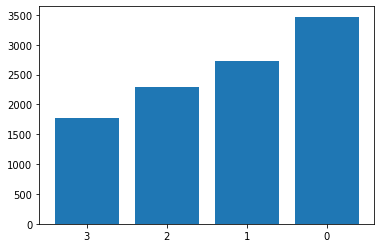

In [19]:
df_trn_val = df2.copy()

# number of reviews by class
counter = Counter(df_trn_val[label])
clas_0, clas_1, clas_2, clas_3 = counter[0], counter[1], counter[2], counter[3]
num = len(df_trn_val)
pc_clas_0, pc_clas_1 = round((clas_0/num)*100,2), round((clas_1/num)*100,2)
pc_clas_2, pc_clas_3 = round((clas_2/num)*100,2), round((clas_3/num)*100,2)
print(f'\nnumber of text of class 0: {clas_0} ({pc_clas_0}%)')
print(f'number of text of class 1: {clas_1} ({pc_clas_1}%)')
print(f'number of text of class 2: {clas_2} ({pc_clas_2}%)')
print(f'number of text of class 3: {clas_3} ({pc_clas_3}%)')
print(f'\n(final) number of all texts: {num}') 

# plot histogram
keys = list(df_trn_val[label].value_counts().keys())
values = list(df_trn_val[label].value_counts().array)
plt.bar(keys, values[::-1]) 
plt.xticks(keys, keys[::-1])
# print(df_trn_val['label'].value_counts())
plt.show()

In [20]:
df_trn_val.head()

,text,labels
0,A medida cautelar do TCU que determina a suspe...,3
1,A retenção de recursos pela Administração com ...,3
2,Para fins de admissibilidade de recurso de rev...,3
3,"Fotografias não têm pleno valor probatório, so...",3
4,Não cabe instauração de tomada de contas espec...,3


In [21]:
df_trn_val.to_csv(path_data/'tcu_jurisp_reduzido_preprocessed.csv', index = None, header=True)

## Fine-tuning "forward LM"

In [10]:
name_data = 'TCU'
path_data = data_path/name_data

# Load csv
df_trn_val = pd.read_csv(path_data/'tcu_jurisp_reduzido_preprocessed.csv')

# columns names
reviews = "text"
label = "labels"

In [11]:
dest = path/'corpus2_100'
(dest/'tmp').ls()

[PosixPath('/home/jupyter/.fastai/data/ptwiki/corpus2_100/tmp/spm.model'),
 PosixPath('/home/jupyter/.fastai/data/ptwiki/corpus2_100/tmp/spm.vocab')]

### Databunch

In [22]:
%%time
data_lm = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))

CPU times: user 1 s, sys: 156 ms, total: 1.16 s
Wall time: 1.67 s


In [23]:
data_lm.save(f'{path}/{lang}_databunch_lm_tcu_jurisp_reduzido_sp15_multifit_v2')

### Training

In [24]:
data_lm = load_data(path, f'{lang}_databunch_lm_tcu_jurisp_reduzido_sp15_multifit_v2', bs=bs)

In [25]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [26]:
%%time
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, config=config, pretrained_fnames=lm_fns3, drop_mult=1., 
                                  metrics=[error_rate, accuracy, perplexity]).to_fp16()

CPU times: user 4.14 s, sys: 1.22 s, total: 5.35 s
Wall time: 4.6 s


In [27]:
# number of model parameters
sum([p.numel() for p in learn_lm.model.parameters()])

46020150

In [28]:
learn_lm.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(15000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(15000, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=800, out_features=4650, bias=True)
            )
          )
        )
      )
      (1): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1550, out_features=4650, bias=True)
            )
          )
        )
      )
      (2): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1550, out_features=4650, bias=True)
            )
          )
        )
      )
      (3): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightD

#### Change loss function

In [29]:
learn_lm.loss_func

FlattenedLoss of CrossEntropyLoss()

In [30]:
learn_lm.loss_func = FlattenedLoss(LabelSmoothingCrossEntropy)

In [31]:
learn_lm.loss_func

FlattenedLoss of LabelSmoothingCrossEntropy()

#### Training

In [32]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


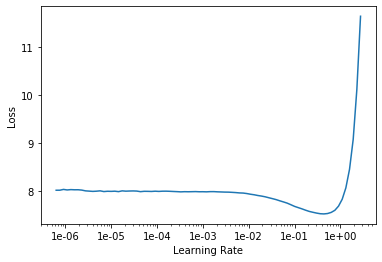

In [33]:
learn_lm.recorder.plot()

In [35]:
lr = 2e-2
lr *= bs/48

wd = 0.1

In [36]:
learn_lm.fit_one_cycle(2, lr*10, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,23.825766,13.385324,0.969197,0.030803,628923.312500,00:07
1,8.161844,6.876748,0.936191,0.063810,571.473938,00:07


In [37]:
learn_lm.save(f'{lang}fine_tuned1_tcu_jurisp_reduzido_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned1_enc_tcu_jurisp_reduzido_sp15_multifit_v2')

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,6.500302,6.185975,0.854571,0.145429,262.548920,00:10
1,5.490670,5.003970,0.722680,0.277320,68.926476,00:10
2,4.755301,4.457559,0.653755,0.346245,36.102261,00:10
3,4.416079,4.209779,0.621551,0.378449,27.896441,00:10
4,4.276728,4.118284,0.608721,0.391279,24.504759,00:10
5,4.199481,4.036489,0.597565,0.402435,22.284594,00:10
6,4.117595,3.955703,0.584517,0.415483,20.709642,00:10
7,4.023516,3.906753,0.574245,0.425755,19.213202,00:10
8,3.942492,3.827708,0.562653,0.437347,17.807081,00:10
9,3.849638,3.768771,0.554177,0.445823,16.522247,00:10


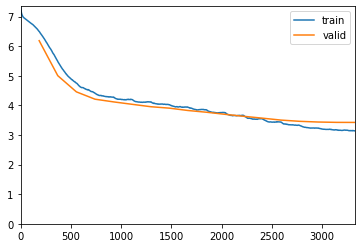

In [38]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(18, lr, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [39]:
learn_lm.save(f'{lang}fine_tuned2_lenerbr_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned2_enc_lenerbr_sp15_multifit_v2')

Save best LM learner and its encoder

In [40]:
learn_lm.save(f'{lang}fine_tuned_tcu_jurisp_reduzido_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned_enc_tcu_jurisp_reduzido_sp15_multifit_v2')

## Fine-tuning "backward LM"

### Databunch

In [41]:
%%time
data_lm = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1, backwards=True))

CPU times: user 1.03 s, sys: 560 ms, total: 1.59 s
Wall time: 2.12 s


In [42]:
data_lm.save(f'{path}/{lang}_databunch_lm_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

### Training

In [43]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcu_jurisp_reduzido_sp15_multifit_bwd_v2', bs=bs, backwards=True)

CPU times: user 84 ms, sys: 12 ms, total: 96 ms
Wall time: 94.2 ms


In [44]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [45]:
%%time
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, config=config, pretrained_fnames=lm_fns3_bwd, drop_mult=1., 
                                  metrics=[error_rate, accuracy, perplexity]).to_fp16()

CPU times: user 1.32 s, sys: 220 ms, total: 1.54 s
Wall time: 2.26 s


#### Change loss function

In [46]:
learn_lm.loss_func

FlattenedLoss of CrossEntropyLoss()

In [47]:
learn_lm.loss_func = FlattenedLoss(LabelSmoothingCrossEntropy)

In [48]:
learn_lm.loss_func

FlattenedLoss of LabelSmoothingCrossEntropy()

#### Training

In [49]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


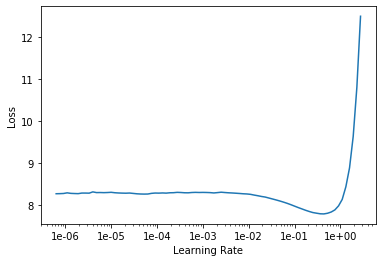

In [50]:
learn_lm.recorder.plot()

In [51]:
lr = 2e-2
lr *= bs/48

wd = 0.1

In [52]:
learn_lm.fit_one_cycle(2, lr*10, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,25.742983,12.599795,0.973891,0.026109,274962.812500,00:07
1,8.696360,7.004283,0.947224,0.052776,679.854126,00:07


In [53]:
learn_lm.save(f'{lang}fine_tuned1_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned1_enc_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,6.780813,6.621964,0.906871,0.093129,438.378723,00:10
1,6.005637,5.547102,0.754204,0.245796,127.223434,00:10
2,5.041389,4.688619,0.657497,0.342503,48.792183,00:10
3,4.581665,4.350106,0.612980,0.387020,32.847675,00:10
4,4.374249,4.186480,0.594299,0.405701,27.221252,00:10
5,4.251293,4.090651,0.578639,0.421361,24.088449,00:10
6,4.170560,4.033818,0.570340,0.429660,22.518152,00:10
7,4.095521,3.955774,0.559905,0.440095,20.811506,00:10
8,4.003619,3.898648,0.549537,0.450463,19.151363,00:10
9,3.920332,3.830895,0.541905,0.458095,18.010420,00:10


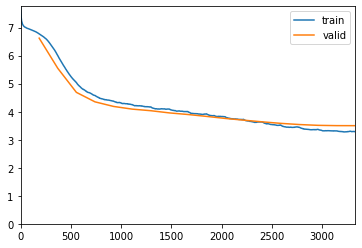

In [54]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(18, lr, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [55]:
learn_lm.save(f'{lang}fine_tuned2_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned2_enc_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

Save best LM learner and its encoder

In [56]:
learn_lm.save(f'{lang}fine_tuned_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned_enc_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

## Fine-tuning "forward Classifier"

In [12]:
bs = 18

### Databunch

In [13]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcu_jurisp_reduzido_sp15_multifit_v2', bs=bs)

CPU times: user 80 ms, sys: 32 ms, total: 112 ms
Wall time: 678 ms


In [14]:
%%time
data_clas = (TextList.from_df(df_trn_val, path, vocab=data_lm.vocab, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_from_df(cols=label)
    .databunch(bs=bs, num_workers=1))

CPU times: user 1.27 s, sys: 140 ms, total: 1.41 s
Wall time: 2.51 s


In [15]:
%%time
data_clas.save(f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_v2')

CPU times: user 188 ms, sys: 28 ms, total: 216 ms
Wall time: 240 ms


### Get weights to penalize loss function of the majority class

In [17]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_v2', bs=bs, num_workers=1)

CPU times: user 384 ms, sys: 0 ns, total: 384 ms
Wall time: 384 ms


In [18]:
num_trn = len(data_clas.train_ds.x)
num_val = len(data_clas.valid_ds.x)
num_trn, num_val, num_trn+num_val

(9237, 1026, 10263)

In [19]:
trn_LabelCounts = np.unique(data_clas.train_ds.y.items, return_counts=True)[1]
val_LabelCounts = np.unique(data_clas.valid_ds.y.items, return_counts=True)[1]
trn_LabelCounts, val_LabelCounts

(array([3136, 2439, 2084, 1578]), array([332, 284, 213, 197]))

In [20]:
trn_weights = [1 - count/num_trn for count in trn_LabelCounts]
val_weights = [1 - count/num_val for count in val_LabelCounts]
trn_weights, val_weights

([0.6604958319800801,
  0.7359532315686912,
  0.7743856230377828,
  0.8291653134134459],
 [0.6764132553606238,
  0.723196881091618,
  0.7923976608187134,
  0.8079922027290448])

### Training (Loss = FlattenedLoss of weighted LabelSmoothingCrossEntropy)

In [46]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_v2', bs=bs, num_workers=1)

CPU times: user 344 ms, sys: 24 ms, total: 368 ms
Wall time: 364 ms


In [47]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [48]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, pretrained=False, drop_mult=0.3, 
                                  metrics=[accuracy,f1]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc_tcu_jurisp_reduzido_sp15_multifit_v2');

#### Change loss function

In [49]:
learn_c.loss_func

FlattenedLoss of CrossEntropyLoss()

In [50]:
loss_weights = torch.FloatTensor(trn_weights).cuda()
learn_c.loss_func = FlattenedLoss(WeightedLabelSmoothingCrossEntropy, weight=loss_weights)

In [51]:
learn_c.loss_func

FlattenedLoss of WeightedLabelSmoothingCrossEntropy()

#### Training

In [52]:
learn_c.freeze()

In [28]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


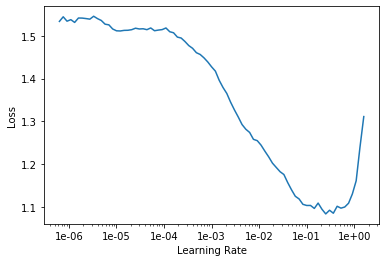

In [29]:
learn_c.recorder.plot()

In [53]:
lr = 2e-1
lr *= bs/48

wd = 0.1

In [54]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.749393,0.631815,0.868421,0.869856,00:08
1,0.628098,0.542874,0.916179,0.915374,00:09


In [55]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')

In [56]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.716813,0.927593,0.720273,0.683785,00:09
1,0.643462,0.551566,0.905458,0.907423,00:08


In [57]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')

In [58]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.672351,0.656076,0.863548,0.857651,00:09
1,0.534614,0.461940,0.951267,0.950608,00:09


In [59]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')

In [60]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.623553,0.508049,0.924951,0.924046,00:12
1,0.489635,0.447499,0.958090,0.958690,00:12


In [61]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')

In [62]:
learn_c.unfreeze()
learn_c.fit_one_cycle(4, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.467003,0.448250,0.962963,0.963586,00:23
1,0.471006,0.450991,0.963938,0.962333,00:21
2,0.437463,0.431128,0.965887,0.964934,00:20
3,0.409270,0.429323,0.969786,0.968492,00:21


In [63]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')

In [64]:
learn_c.load(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')
learn_c.fit_one_cycle(4, slice(lr/100/(2.6**4),lr/100), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.412864,0.429698,0.964912,0.963988,00:20
1,0.402781,0.427383,0.966862,0.965871,00:22
2,0.401838,0.428162,0.968811,0.967614,00:22
3,0.399231,0.426054,0.968811,0.967874,00:20


In [65]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')

In [69]:
learn_c.load(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')
learn_c.fit_one_cycle(2, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.405359,0.430013,0.971735,0.970652,00:20
1,0.389910,0.425390,0.970760,0.969534,00:20


In [70]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2')

### Confusion matrix

In [71]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_v2', bs=bs, num_workers=1);

config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config)

CPU times: user 1.26 s, sys: 236 ms, total: 1.5 s
Wall time: 2.9 s


In [72]:
learn_c.load(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2', purge=False);

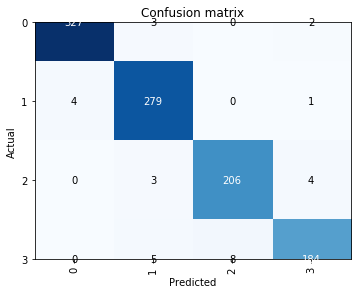

In [73]:
preds,y,losses = learn_c.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(y), np.array(predictions))
print(cm)

## acc
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')

[[327   3   0   2]
 [  4 279   0   1]
 [  0   3 206   4]
 [  0   5   8 184]]
accuracy global: 0.9707602339181286
accuracy on class 0: 98.49397590361446
accuracy on class 1: 98.23943661971832
accuracy on class 2: 96.71361502347418
accuracy on class 3: 93.4010152284264


In [75]:
learn_c.show_results()

text,target,prediction
"▁xxbos ▁a ▁assistência ▁judicial ▁por ▁parte ▁do ▁xxmaj ▁poder ▁xxmaj ▁público ▁aos ▁membros ▁do ▁xxmaj ▁ministério ▁xxmaj ▁público ▁da ▁xxmaj ▁união , ▁em ▁ações ▁propostas ▁por ▁pessoas ▁física s ▁ou ▁jurídica s ▁por ▁eles ▁investiga das , ▁deverá ▁pa u tar - se ▁pelos ▁seguintes ▁critérios : < ▁/ ▁p >< p > a ) ▁nas ▁hipótese s ▁em ▁que ▁as ▁demanda s ▁judiciais ▁mo vidas ▁contra ▁os ▁membros ▁do",1,1
"▁xxbos ▁xxmaj ▁nos ▁processos ▁li cita tório s ▁sob ▁a ▁modalidade ▁pre gão ▁que ▁se ▁de stin em ▁ao ▁fornecimento ▁de ▁bens ▁e ▁serviços ▁comuns ▁de ▁informática ▁e ▁auto ma ção , ▁verifica do ▁empate ▁entre ▁propostas ▁comerciais , ▁a ▁xxmaj ▁administração ▁xxmaj ▁pública ▁xxmaj ▁federal ▁deverá ▁adotar ▁os ▁seguintes ▁procedimento s : ▁i . ▁analisar , ▁primeiro , ▁se ▁algum ▁dos ▁li cita ntes ▁está ▁oferta ndo ▁bem ▁ou",1,1
"▁xxbos ▁xxmaj ▁os ▁requisitos ▁a ▁serem ▁pre en chi dos , ▁no ▁momento ▁do ▁ ó bit o ▁do ▁institui dor , ▁para ▁a ▁habilita ção ▁e ▁manutenção ▁da ▁qualidade ▁de ▁filha ▁maior ▁sol t eira , ▁como ▁depende nte ▁de ▁pen são ▁são : ▁a ) ▁ser ▁sol t eira , ▁viúva ▁ou ▁de s qui tada , ▁independente mente ▁da ▁idade ▁( pode ▁ser ▁maior ▁ou ▁menor ▁de",0,0
"▁xxbos ▁é ▁permitida ▁a ▁utilização ▁do ▁chama mento ▁público ▁para ▁per m uta ▁de ▁imóveis ▁da ▁xxmaj ▁união ▁como ▁mecanismo ▁de ▁pro spec ção ▁de ▁mercado , ▁para ▁fim ▁de ▁identificar ▁os ▁imóveis ▁ele g íveis ▁que ▁a ten da m ▁às ▁necessidades ▁da ▁xxmaj ▁união , ▁com ▁atendimento ▁aos ▁princípios ▁da ▁im pessoa lidade , ▁moral idade ▁e ▁publicidade , ▁deve ndo , ▁posteriormente , ▁ser ▁utilizadas ▁várias ▁fontes",1,1
"▁xxbos ▁xxmaj ▁como ▁alternativa ▁à ▁re ten ção ▁ cau te lar ▁de ▁pagamento s , ▁a ▁xxmaj ▁administração ▁pode ▁pro pi cia r ▁ao ▁contratado ▁a ▁oportunidade ▁de ▁oferecer ▁nova ▁ fia nça ▁bancária ▁ou ▁outra ▁garantia ▁de ▁alta ▁ liquid ez ▁dentre ▁aquela s ▁prevista s ▁no ▁art . ▁ 56 , ▁ § ▁1 o , ▁da ▁xxmaj ▁lei ▁8 . 6 66 ▁/ ▁1993, ▁de ▁a",3,3


### Predictions some random sentences

In [76]:
# Get the prediction
test_text = "A medida cautelar do TCU que determina a suspensão de licitação por falhas no edital não impede o órgão ou a entidade de rever seu ato convocatório, valendo-se do poder de autotutela (art. 49 da Lei 8.666/1993 c/c o art. 9º da Lei 10.520/2002) , com o objetivo de, antecipando-se a eventual deliberação do Tribunal, promover de modo próprio a anulação da licitação e o refazimento do edital, livre dos vícios apontados."
pred = learn_c.predict(test_text)
print(pred)

(Category 1, tensor(1), tensor([0.0193, 0.7045, 0.0242, 0.2520]))


In [77]:
# The darker the word-shading in the below example, the more it contributes to the classification. 
txt_ci = TextClassificationInterpretation.from_learner(learn_c)
txt_ci.show_intrinsic_attention(test_text,cmap=plt.cm.Purples)

In [78]:
txt_ci.intrinsic_attention(test_text)[1]

tensor([0.2395, 0.6145, 0.8318, 0.5050, 0.9821, 1.0000, 0.5648, 0.1259, 0.0754,
        0.1899, 0.2945, 0.1241, 0.0776, 0.1660, 0.1436, 0.2270, 0.1089, 0.1496,
        0.0836, 0.0363, 0.0872, 0.2356, 0.0342, 0.0443, 0.0896, 0.1303, 0.1193,
        0.0666, 0.1301, 0.0322, 0.0787, 0.1167, 0.1554, 0.2903, 0.0753, 0.1617,
        0.1949, 0.4512, 0.6584, 0.0610, 0.0571, 0.1333, 0.0393, 0.0493, 0.0936,
        0.1043, 0.2322, 0.5054, 0.4923, 0.1743, 0.1532, 0.0799, 0.0238, 0.0178,
        0.0152, 0.0184, 0.0459, 0.0170, 0.0167, 0.0335, 0.0389, 0.0949, 0.2626,
        0.2967, 0.0161, 0.0526, 0.0600, 0.0407, 0.0855, 0.0151, 0.0091, 0.0165,
        0.0194, 0.0110, 0.0180, 0.0304, 0.0254, 0.0369, 0.2418, 0.2850, 0.3064,
        0.0873, 0.1301, 0.0248, 0.0222, 0.0110, 0.0131, 0.0415, 0.0622, 0.0540,
        0.0430, 0.1060, 0.0663, 0.0510, 0.0401, 0.0531, 0.0810, 0.1038, 0.2476,
        0.0991, 0.0421, 0.1390, 0.2452, 0.0683, 0.1305, 0.0378, 0.0639, 0.0499,
        0.0519, 0.1165, 0.1615, 0.0988, 

In [79]:
# tabulation showing the first k texts in top_losses along with their prediction, actual,loss, and probability of actual class.
# max_len is the maximum number of tokens displayed. If max_len=None, it will display all tokens.
txt_ci.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
"▁xxbos ▁a ▁adoção , ▁por ▁conselho ▁de ▁fiscalização ▁profissional , ▁da ▁modalidade ▁de ▁li cita ção ▁convite ▁para ▁a ▁contratação ▁de ▁serviços ▁ad voca t ício s ▁que ▁possam ▁ser ▁considerados ▁como ▁objeto ▁comum ▁ inf ring e ▁o ▁disposto ▁no ▁art . ▁4 o ▁do ▁xxmaj ▁decreto ▁5 . 4 50 ▁/ ▁2005, ▁que ▁determina ▁a ▁utilização ▁do ▁pre gão , ▁prefere ncial mente ▁na ▁forma ▁eletrônica .",2,1,4.31,0.03
▁xxbos ▁a ▁concessão ▁de ▁pen são ▁da ▁xxmaj ▁lei ▁3. 37 3 ▁/ ▁1958 ▁a ▁filho ▁maior ▁in vá lido ▁requer ▁ lau do ▁peri cial ▁emitido ▁por ▁junta ▁médica ▁oficial ▁que ▁a tes te ▁a ▁in vali dez ▁e ▁sua ▁pre ex ist ência ▁no ▁momento ▁do ▁ ó bit o ▁do ▁institui dor .,1,0,3.58,0.02
"▁xxbos ▁xxmaj ▁falecido ▁o ▁responsável , ▁a ▁obriga ção ▁de ▁re para r ▁o ▁da no ▁re ca i ▁sobre ▁o ▁seu ▁ esp ólio ▁ou , ▁caso ▁concluída ▁a ▁partilha , ▁aos ▁sucesso res ▁até ▁o ▁limite ▁do ▁valor ▁do ▁patrimônio ▁transferido . ▁xxmaj ▁ ante ▁o ▁seu ▁caráter ▁ persona l íssimo , ▁a ▁multa ▁não ▁se ▁trans fer e ▁aos ▁sucesso res .",2,2,3.04,0.91
"▁xxbos ▁a ▁xxmaj ▁administração ▁deve ▁a ten tar ▁para ▁os ▁per cent uais ▁aplicado s ▁de ▁xxup ▁b di ▁sobre ▁serviços , ▁materiais ▁e ▁equipamentos , ▁de ▁forma ▁a ▁ corri gir ▁eventual ▁disto r ção ▁com para tivamente ▁aos ▁preços ▁de ▁mercado , ▁avalia ndo ▁quanto ▁a ▁estes ▁dois ▁últimos ▁( mate ria is ▁e ▁equipamentos ) ▁a ▁possibilidade ▁de ▁ela ▁própria ▁rea vali ar ▁as ▁compra s ▁de",2,1,3.03,0.01
"▁xxbos ▁é ▁possível ▁a ▁ respons a bil ização ▁de ▁agentes ▁políticos ▁nas ▁hipótese s ▁de ▁( i ) ▁prática ▁de ▁ato ▁administrativo ▁de ▁gestão ▁ou ▁outro ▁ato , ▁o miss ivo ▁ou ▁com is sivo , ▁que ▁esta bel eça ▁corre lação ▁com ▁as ▁irregular idades ▁a pura das ; ▁( ii ) ▁conduta ▁rei ter ada ▁de ▁da no ▁ao ▁e r ário ▁em ▁decorrência ▁da ▁execução ▁deficiente",2,2,2.97,0.90


## Fine-tuning "backward Classifier"

In [80]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

In [81]:
bs = 18

### Databunch

In [82]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcu_jurisp_reduzido_sp15_multifit_bwd_v2', bs=bs, backwards=True)

CPU times: user 100 ms, sys: 20 ms, total: 120 ms
Wall time: 501 ms


In [83]:
%%time
data_clas = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest), vocab=data_lm.vocab)
    .split_by_rand_pct(0.1, seed=42)
    .label_from_df(cols=label)
    .databunch(bs=bs, num_workers=1, backwards=True))

CPU times: user 1.25 s, sys: 420 ms, total: 1.67 s
Wall time: 2.46 s


In [84]:
%%time
data_clas.save(f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

CPU times: user 176 ms, sys: 16 ms, total: 192 ms
Wall time: 193 ms


### Get weights to penalize loss function of the majority class

In [85]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

CPU times: user 420 ms, sys: 4 ms, total: 424 ms
Wall time: 398 ms


In [86]:
num_trn = len(data_clas.train_ds.x)
num_val = len(data_clas.valid_ds.x)
num_trn, num_val, num_trn+num_val

(9237, 1026, 10263)

In [87]:
trn_LabelCounts = np.unique(data_clas.train_ds.y.items, return_counts=True)[1]
val_LabelCounts = np.unique(data_clas.valid_ds.y.items, return_counts=True)[1]
trn_LabelCounts, val_LabelCounts

(array([3136, 2439, 2084, 1578]), array([332, 284, 213, 197]))

In [88]:
trn_weights = [1 - count/num_trn for count in trn_LabelCounts]
val_weights = [1 - count/num_val for count in val_LabelCounts]
trn_weights, val_weights

([0.6604958319800801,
  0.7359532315686912,
  0.7743856230377828,
  0.8291653134134459],
 [0.6764132553606238,
  0.723196881091618,
  0.7923976608187134,
  0.8079922027290448])

### Training (Loss = FlattenedLoss of weighted LabelSmoothingCrossEntropy)

In [89]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

CPU times: user 404 ms, sys: 0 ns, total: 404 ms
Wall time: 378 ms


In [90]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [91]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.3, metrics=[accuracy,f1]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc_tcu_jurisp_reduzido_sp15_multifit_bwd_v2');

#### Change loss function

In [92]:
learn_c.loss_func

FlattenedLoss of CrossEntropyLoss()

In [93]:
loss_weights = torch.FloatTensor(trn_weights).cuda()
learn_c.loss_func = FlattenedLoss(WeightedLabelSmoothingCrossEntropy, weight=loss_weights)

In [94]:
learn_c.loss_func

FlattenedLoss of WeightedLabelSmoothingCrossEntropy()

#### Training

In [95]:
learn_c.freeze()

In [96]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


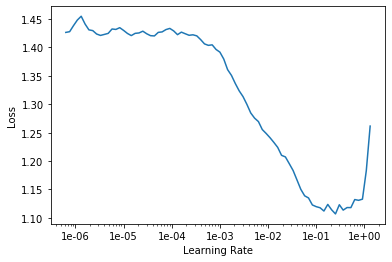

In [97]:
learn_c.recorder.plot()

In [98]:
lr = 2e-1
lr *= bs/48

wd = 0.1

In [99]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.766112,0.790079,0.781676,0.780847,00:09
1,0.633976,0.567282,0.898636,0.898657,00:08


In [100]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

In [101]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.757286,0.706500,0.842105,0.833556,00:08
1,0.656997,0.558589,0.896686,0.897445,00:09


In [102]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

In [103]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.672892,0.761602,0.809942,0.817644,00:09
1,0.529195,0.470551,0.949318,0.950640,00:10


In [104]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

In [105]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.635578,0.555220,0.906433,0.906872,00:12
1,0.547100,0.463824,0.946394,0.947524,00:12


In [106]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

In [107]:
learn_c.unfreeze()
learn_c.fit_one_cycle(4, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.512873,0.447683,0.955166,0.955316,00:22
1,0.503354,0.461661,0.954191,0.953338,00:20
2,0.464976,0.430627,0.965887,0.965267,00:21
3,0.430950,0.434405,0.965887,0.965663,00:21


In [108]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

In [109]:
learn_c.fit_one_cycle(4, slice(lr/100/(2.6**4),lr/100), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.441612,0.432574,0.965887,0.965280,00:21
1,0.422067,0.429031,0.967836,0.967265,00:20
2,0.430873,0.432398,0.970760,0.970493,00:22
3,0.427765,0.433643,0.966862,0.966608,00:22


In [110]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

In [115]:
learn_c.load(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')
learn_c.fit_one_cycle(1, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.424508,0.429726,0.968811,0.968703,00:21


In [116]:
learn_c.fit_one_cycle(1, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.428017,0.431108,0.970760,0.970493,00:20


In [117]:
learn_c.save(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

In [118]:
learn_c.load(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2');
learn_c.to_fp32().export(f'{lang}_classifier_tcu_jurisp_reduzido_sp15_multifit_bwd_v2')

### Confusion matrix

In [119]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config)

CPU times: user 1.83 s, sys: 176 ms, total: 2.01 s
Wall time: 907 ms


In [120]:
learn_c.load(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2', purge=False);

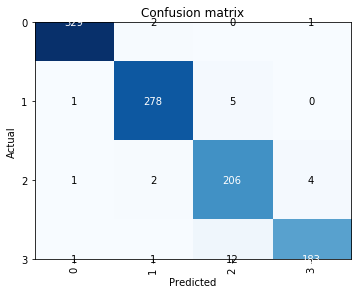

In [121]:
preds,y,losses = learn_c.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(y), np.array(predictions))
print(cm)

## acc
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')

[[329   2   0   1]
 [  1 278   5   0]
 [  1   2 206   4]
 [  1   1  12 183]]
accuracy global: 0.9707602339181286
accuracy on class 0: 99.09638554216868
accuracy on class 1: 97.88732394366197
accuracy on class 2: 96.71361502347418
accuracy on class 3: 92.89340101522842


In [123]:
learn_c.show_results()

text,target,prediction
". ▁ ) ▁1993 ▁/ 66 6 . ▁8 ▁lei ▁xxmaj ▁da o ▁3 . art ▁( ” ▁administração ▁xxmaj ▁a ▁para a jos ta ▁van ▁mais ▁proposta ▁a r ciona le se ▁“ ▁a ▁modo ▁de , s ▁interessado uais vent ▁e ▁os ▁entre ” mia no ▁iso ▁da ▁constitucional ▁princípio ▁do ância v er ▁obs ▁a r anti gar ▁“ ▁necessariamente ▁deverá ▁administração ▁xxmaj ▁a , ▁questão ▁em",1,1
"▁2002. ▁/ 20 5 . ▁10 ▁lei ▁xxmaj ▁da o ▁9 . ▁art ▁do ▁força ▁por gão ▁pre ▁xxmaj ▁ao mente aria idi s ▁sub ável c pli ▁a ▁1993, ▁/ 66 6 . ▁8 ▁lei ▁xxmaj ▁da , o ▁2 § ▁ , ▁45 . ▁art ▁no ▁disposto ▁o ▁observado , ▁público ▁interesse ▁ao á ▁atender ▁que ▁oferta ▁da ▁sorteio ▁ao r ▁procede ▁1991, ▁/ 48 2 . ▁8",1,1
". são ▁pen ▁de ▁benefício ▁do ▁econômica ▁dependência ▁a ize ter ac scar ▁de ▁que ▁renda r feri u ▁a ) ▁c ▁ou ; ▁ocupação ▁dessa corrente ▁de ▁aposentadoria ▁receber ▁ou , ▁indireta ▁xxmaj ▁ou ▁direta ▁xxmaj ▁pública ▁xxmaj ▁administração ▁xxmaj ▁na ▁efetivo ▁cargo ▁ocupar ) ▁b ; ▁estável ▁união ▁de ▁situação ▁na ▁encontrar ▁se ▁ou ▁casamento ído ▁contra ▁ter ) ▁a : ▁benefício ▁do ▁percepção ▁à ▁direito ▁do tivas",0,0
". ▁escolhida ▁opção ▁a ▁para ção ▁motiva ▁adequada ▁a ▁observar ndo ▁deve ▁1998, ▁/ 36 6 . ▁9 ▁lei ▁xxmaj ▁da , o ▁2 § ▁ , ▁30 . ▁art ▁do ▁e ▁1993 ▁/ 66 6 . ▁8 ▁lei ▁xxmaj ▁da , ▁i ▁xxup so inci ▁ , ▁17 . ▁art ▁do ▁termos ▁nos , tório cita ▁li ▁procedimento ▁o ▁realizar ▁ou ▁1993, ▁/ 66 6 . ▁8 ▁lei ▁xxmaj",1,1
". ▁vigor ▁em mente ida ▁val ▁estiver ▁alternativa ▁medida ▁a ▁enquanto ▁eficácia ▁sua e ▁suspend ▁mas , s ▁pagamento ▁de ção ten ▁re ▁de lar te cau ▁ ▁a ▁revoga ▁não ▁referência ▁em ▁alternativa ▁medida ▁da ▁adoção ▁a , ▁casos s ▁nesse ▁xxmaj . ▁valores ir titu res ▁ ▁a ▁contratada ▁empresa ▁a ne ▁conde ▁que ▁tribunal ▁xxmaj ▁deste dão r có ▁a ▁eventual ▁de ▁julgado ▁em ▁trânsito ▁o ▁após",3,3


### Predictions some random sentences

In [124]:
# Get the prediction
test_text = "A medida cautelar do TCU que determina a suspensão de licitação por falhas no edital não impede o órgão ou a entidade de rever seu ato convocatório, valendo-se do poder de autotutela (art. 49 da Lei 8.666/1993 c/c o art. 9º da Lei 10.520/2002) , com o objetivo de, antecipando-se a eventual deliberação do Tribunal, promover de modo próprio a anulação da licitação e o refazimento do edital, livre dos vícios apontados."
pred = learn_c.predict(test_text)
print(pred)

(Category 3, tensor(3), tensor([0.0095, 0.1228, 0.0891, 0.7785]))


In [125]:
# The darker the word-shading in the below example, the more it contributes to the classification. 
txt_ci = TextClassificationInterpretation.from_learner(learn_c)
txt_ci.show_intrinsic_attention(test_text,cmap=plt.cm.Purples)

In [126]:
txt_ci.intrinsic_attention(test_text)[1]

tensor([0.0440, 0.0597, 0.1282, 0.1160, 0.2387, 0.2270, 0.0274, 0.0446, 0.0321,
        0.0675, 0.0699, 0.0328, 0.0472, 0.1784, 0.3785, 0.1595, 0.0891, 0.0143,
        0.0246, 0.0554, 0.0706, 0.0741, 0.0281, 0.0738, 0.0480, 0.0486, 0.1095,
        0.0978, 0.0815, 0.1162, 0.1015, 0.2267, 0.1001, 0.0349, 0.1285, 0.2844,
        0.0148, 0.0181, 0.0062, 0.0109, 0.0138, 0.0493, 0.0709, 0.0110, 0.0093,
        0.0148, 0.0079, 0.0101, 0.0200, 0.0354, 0.0605, 0.0379, 0.0420, 0.0856,
        0.0557, 0.0167, 0.0172, 0.0105, 0.0098, 0.0284, 0.0583, 0.0142, 0.0201,
        0.0193, 0.0110, 0.0186, 0.0167, 0.0271, 0.0528, 0.0899, 0.1545, 0.0456,
        0.0219, 0.0315, 0.0358, 0.0052, 0.0151, 0.0303, 0.0187, 0.0293, 0.0269,
        0.0546, 0.1531, 0.1788, 0.1044, 0.1432, 0.0371, 0.0347, 0.0338, 0.0615,
        0.0187, 0.0492, 0.0584, 0.0502, 0.1698, 0.3144, 0.1714, 0.0701, 0.1377,
        0.0382, 0.0842, 0.0190, 0.0597, 0.1201, 0.0680, 0.1715, 0.0999, 0.2089,
        0.1084, 0.0650, 0.0587, 0.1827, 

In [127]:
# tabulation showing the first k texts in top_losses along with their prediction, actual,loss, and probability of actual class.
# max_len is the maximum number of tokens displayed. If max_len=None, it will display all tokens.
txt_ci.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
"▁xxbos ▁xxmaj ▁consideram - se ▁i liquid áveis ▁as ▁conta s , ▁ordena ndo - se ▁o ▁seu ▁tran ca mento , ▁em ▁razão ▁da ▁imp os s ibilidade ▁do ▁exercício ▁de ▁ampla ▁defesa , ▁pelo ▁longo ▁de curso ▁de ▁tempo ▁entre ▁a ▁prática ▁do ▁ato ▁e ▁a ▁cita ção ▁do ▁responsável .",3,3,3.10,0.91
"▁xxbos ▁xxmaj ▁como ▁regra ▁geral , ▁sujeita ▁a ▁po nder ação ▁no ▁caso ▁concreto , ▁o ▁parcela mento ▁do ▁objeto ▁deve ▁ser ▁adotado ▁na ▁contratação ▁de ▁serviços ▁de ▁maior ▁especialização ▁técnica , ▁sendo ▁de s ne ces s ário ▁nos ▁serviços ▁de ▁menor ▁especialização .",1,1,2.76,0.81
"▁xxbos ▁xxmaj ▁falecido ▁o ▁responsável , ▁a ▁obriga ção ▁de ▁re para r ▁o ▁da no ▁re ca i ▁sobre ▁o ▁seu ▁ esp ólio ▁ou , ▁caso ▁concluída ▁a ▁partilha , ▁aos ▁sucesso res ▁até ▁o ▁limite ▁do ▁valor ▁do ▁patrimônio ▁transferido . ▁xxmaj ▁ ante ▁o ▁seu ▁caráter ▁ persona l íssimo , ▁a ▁multa ▁não ▁se ▁trans fer e ▁aos ▁sucesso res .",2,2,2.64,0.86
"▁xxbos ▁xxmaj ▁ao ▁firma r ▁termo ▁de ▁parceria ▁com ▁xxmaj ▁os cip ▁que ▁em ▁a ve nça ▁anterior ▁deixou ▁de ▁obedece r ▁normas ▁técnicas ▁na ▁execução ▁de ▁projeto ▁semelhante ▁e ▁de ▁mesma ▁natureza , ▁apresentando ▁erros ▁graves ▁na ▁presta ção ▁dos ▁serviços , ▁o ▁gesto r ▁assume ▁o ▁risco ▁de ▁in sucesso ▁e ▁de ▁prejuízo ▁ao ▁e r ário , ▁responde ndo ▁sol ida ria mente ▁pelo ▁da no .",1,2,2.61,0.27
"▁xxbos ▁a ▁apresentação ▁de ▁presta ção ▁conta s ▁fora ▁de ▁prazo ▁ ajusta do , ▁sem ▁justifica tiva ▁para ▁a ▁falta , ▁não ▁e li de ▁a ▁respectiva ▁o missão .",3,2,2.61,0.07


## Ensemble

In [128]:
bs = 18

In [129]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [130]:
data_clas = load_data(path, f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_v2', bs=bs, num_workers=1)
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.3, metrics=[accuracy,f1]).to_fp16()
learn_c.load(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_v2', purge=False);

In [131]:
preds,targs = learn_c.get_preds(ordered=True)
accuracy(preds,targs),f1(preds,targs)

(tensor(0.9708), tensor(0.9707))

In [132]:
data_clas_bwd = load_data(path, f'{lang}_textlist_class_tcu_jurisp_reduzido_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)
learn_c_bwd = text_classifier_learner(data_clas_bwd, AWD_LSTM, config=config, drop_mult=0.3, metrics=[accuracy,f1]).to_fp16()
learn_c_bwd.load(f'{lang}clas_tcu_jurisp_reduzido_sp15_multifit_bwd_v2', purge=False);

In [133]:
preds_b,targs_b = learn_c_bwd.get_preds(ordered=True)
accuracy(preds_b,targs_b),f1(preds_b,targs_b)

(tensor(0.9708), tensor(0.9708))

In [134]:
preds_avg = (preds+preds_b)/2

In [135]:
accuracy(preds_avg,targs_b),f1(preds_avg,targs_b)

(tensor(0.9795), tensor(0.9795))

In [136]:
from sklearn.metrics import confusion_matrix

predictions = np.argmax(preds_avg, axis = 1)
cm = confusion_matrix(np.array(targs_b), np.array(predictions))
print(cm)

## acc
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')

[[330   2   0   0]
 [  0 282   2   0]
 [  0   1 207   5]
 [  0   2   9 186]]
accuracy global: 0.97953216374269
accuracy on class 0: 99.3975903614458
accuracy on class 1: 99.29577464788733
accuracy on class 2: 97.1830985915493
accuracy on class 3: 94.41624365482234
